In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from src.dynamic_pricing_data_loader import cargar_y_preparar_datos

In [2]:
def Get_Data():
    # Obtener el directorio de trabajo actual (ruta principal del proyecto).
    ruta_principal = os.getcwd()

    # Construir la ruta al archivo de configuración "config/config.json".
    config_path = os.path.join(ruta_principal, "config", "config.json")

    # Llamar a la función externa que carga y realiza preprocesamiento inicial.
    Frame = cargar_y_preparar_datos(config_path, ruta_principal)

    # Seleccionar solo las columnas relevantes para el análisis.
    Frame = Frame[["FECHA_CORRIDA", "HORA_SALIDA_CORRIDA", "CLASE_SERVICIO", "TIPO_BUS",
    "PAX_SUBEN", "TARIFA_BASE_TRAMO",'FECHA_OPERACION', 'HORA_OPERACION','VENTA','DISPONIBILIDAD_TRAMO']].copy()

    return Frame

In [3]:
df=Get_Data()

Memoria usada antes: 620.97 MB
Memoria usada después: 120.73 MB
Reducción: 80.6%


In [4]:
df['HORA_OPERACION'] = pd.to_datetime(
    df['HORA_OPERACION']
).dt.time

# 1. Combinar fecha y hora en una sola columna datetime
df['FECHA_HORA_OPERACION'] = pd.to_datetime(
    df['FECHA_OPERACION'].astype(str) + ' ' + df['HORA_OPERACION'].astype(str),
    errors='coerce'
)

In [5]:
df.head()

,FECHA_CORRIDA,HORA_SALIDA_CORRIDA,CLASE_SERVICIO,TIPO_BUS,PAX_SUBEN,TARIFA_BASE_TRAMO,FECHA_OPERACION,HORA_OPERACION,VENTA,DISPONIBILIDAD_TRAMO,FECHA_HORA_OPERACION
0,2023-01-01,1900-01-01 08:20:00,DOS PISOS ETN,MAN AYATS 2019,35,978.450012,2023-01-01,00:17:12,888.359985,0,2023-01-01 00:17:12
1,2023-01-03,1900-01-01 11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-01,00:55:33,880.599976,12,2023-01-01 00:55:33
2,2023-01-03,1900-01-01 11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-01,00:55:33,880.599976,12,2023-01-01 00:55:33
3,2023-01-03,1900-01-01 11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-01,00:55:33,880.599976,12,2023-01-01 00:55:33
4,2023-01-03,1900-01-01 11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-01,00:55:33,880.599976,12,2023-01-01 00:55:33


In [6]:
df_estudio_1=df[["FECHA_CORRIDA", "HORA_SALIDA_CORRIDA", "CLASE_SERVICIO", "TIPO_BUS",
    "PAX_SUBEN", "TARIFA_BASE_TRAMO"]].copy()

In [7]:
""" 'OPERACION', 'TRANSACCION', 'FECHA_OPERACION', 'HORA_OPERACION',
       'NOMBRE_DIA_OPERACION', 'AREA_VENTA', 'CLASE_SERVICIO', 'ORIGEN',
       'DESTINO', 'CV_CORRIDA', 'FECHA_CORRIDA', 'HORA_SALIDA_CORRIDA',
       'TIPO_PASAJERO', 'TIPO_CLIENTE', 'TIPO_OPERACION', 'VENTA_ANTICIPADA',
       'NOMBRE_PASAJERO', 'NUM_ASIENTO', 'PORCENT_PROMO', 'DESC_DESCUENTO',
       'BOLETOS_CANCEL', 'BOLETOS_TOTALES', 'BOLETOS_VEND', 'VENTA_CANCEL',
       'IVA_CANCEL', 'IVA_VENDIDO', 'VENTA_TOTAL', 'VENTA', 'CV_ASIGN',
       'ORIGEN_CORRIDA', 'DESTINO_CORRIDA', 'CAPACIDAD_ASIENTOS_TRAMO',
       'KMS_TRAMO', 'EMPRESA', 'TIPO_CORRIDA', 'TIPO_BUS',
       'HORA_SALIDA_ORIGEN_CORRIDA', 'KMS_ACUM_CORRIDA', 'NOMBRE_DIA_CORRIDA',
       'TARIFA_BASE_TRAMO', 'IVA_TARIFA_BASE_TRAMO', 'INGRESO_TRANSP',
       'IVA_TRANSP', 'DISPONIBILIDAD_TRAMO', 'OCUPACION_TRAMO', 'PAX_BAJAN',
       'PAX_SUBEN', 'TARJETA', 'EFECTIVO', 'EMAIL', 'PAGO_METODO',
       'TOTAL_BOLETOS', 'TOTAL_VENTA', 'DIF_TARIF', 'HORA_DECIMAL', 'AÑO',
       'MES', 'DIAS_ANTICIPACION', 'HORAS_ANTICIPACION',
       'TIEMPO_ANTICIPACION'
"""

" 'OPERACION', 'TRANSACCION', 'FECHA_OPERACION', 'HORA_OPERACION',\n       'NOMBRE_DIA_OPERACION', 'AREA_VENTA', 'CLASE_SERVICIO', 'ORIGEN',\n       'DESTINO', 'CV_CORRIDA', 'FECHA_CORRIDA', 'HORA_SALIDA_CORRIDA',\n       'TIPO_PASAJERO', 'TIPO_CLIENTE', 'TIPO_OPERACION', 'VENTA_ANTICIPADA',\n       'NOMBRE_PASAJERO', 'NUM_ASIENTO', 'PORCENT_PROMO', 'DESC_DESCUENTO',\n       'BOLETOS_CANCEL', 'BOLETOS_TOTALES', 'BOLETOS_VEND', 'VENTA_CANCEL',\n       'IVA_CANCEL', 'IVA_VENDIDO', 'VENTA_TOTAL', 'VENTA', 'CV_ASIGN',\n       'ORIGEN_CORRIDA', 'DESTINO_CORRIDA', 'CAPACIDAD_ASIENTOS_TRAMO',\n       'KMS_TRAMO', 'EMPRESA', 'TIPO_CORRIDA', 'TIPO_BUS',\n       'HORA_SALIDA_ORIGEN_CORRIDA', 'KMS_ACUM_CORRIDA', 'NOMBRE_DIA_CORRIDA',\n       'TARIFA_BASE_TRAMO', 'IVA_TARIFA_BASE_TRAMO', 'INGRESO_TRANSP',\n       'IVA_TRANSP', 'DISPONIBILIDAD_TRAMO', 'OCUPACION_TRAMO', 'PAX_BAJAN',\n       'PAX_SUBEN', 'TARJETA', 'EFECTIVO', 'EMAIL', 'PAGO_METODO',\n       'TOTAL_BOLETOS', 'TOTAL_VENTA', 'DIF_TARI

In [8]:
# Número de NaN por columna
nans_por_columna = df_estudio_1.isna().sum()

print(nans_por_columna)


FECHA_CORRIDA          0
HORA_SALIDA_CORRIDA    0
CLASE_SERVICIO         0
TIPO_BUS               0
PAX_SUBEN              0
TARIFA_BASE_TRAMO      0
dtype: int64


In [9]:
df_estudio_1['HORA_SALIDA_CORRIDA'] = pd.to_datetime(
    df_estudio_1['HORA_SALIDA_CORRIDA']
).dt.time

In [10]:
df_estudio_1.head()

,FECHA_CORRIDA,HORA_SALIDA_CORRIDA,CLASE_SERVICIO,TIPO_BUS,PAX_SUBEN,TARIFA_BASE_TRAMO
0,2023-01-01,08:20:00,DOS PISOS ETN,MAN AYATS 2019,35,978.450012
1,2023-01-03,11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012
2,2023-01-03,11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012
3,2023-01-03,11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012
4,2023-01-03,11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012


In [11]:
print("Iniciando la ingeniería de características...")

# 1. Combinar fecha y hora en una sola columna datetime
df_estudio_1['FECHA_HORA_SALIDA'] = pd.to_datetime(
    df_estudio_1['FECHA_CORRIDA'].astype(str) + ' ' + df_estudio_1['HORA_SALIDA_CORRIDA'].astype(str),
    errors='coerce'
)

# 2. Extraer características de tiempo
df_estudio_1['HORA'] = df_estudio_1['FECHA_HORA_SALIDA'].dt.hour
df_estudio_1['DIA_SEMANA'] = df_estudio_1['FECHA_HORA_SALIDA'].dt.dayofweek # Lunes=0, Domingo=6
df_estudio_1['MES'] = df_estudio_1['FECHA_HORA_SALIDA'].dt.month
df_estudio_1['ANIO'] = df_estudio_1['FECHA_HORA_SALIDA'].dt.year

# 3. Limpiar columnas originales y posibles errores de conversión
df_estudio_1.drop(columns=['FECHA_CORRIDA', 'HORA_SALIDA_CORRIDA'], inplace=True)
df_estudio_1.dropna(subset=['FECHA_HORA_SALIDA'], inplace=True) # Elimina filas si hubo errores al combinar fecha/hora

print("✅ Ingeniería de características completada.")
print("\nVista previa del DataFrame procesado:")

df_estudio_1.head()

Iniciando la ingeniería de características...
✅ Ingeniería de características completada.

Vista previa del DataFrame procesado:


,CLASE_SERVICIO,TIPO_BUS,PAX_SUBEN,TARIFA_BASE_TRAMO,FECHA_HORA_SALIDA,HORA,DIA_SEMANA,MES,ANIO
0,DOS PISOS ETN,MAN AYATS 2019,35,978.450012,2023-01-01 08:20:00,8,6,1,2023
1,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-03 11:00:00,11,1,1,2023
2,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-03 11:00:00,11,1,1,2023
3,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-03 11:00:00,11,1,1,2023
4,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-03 11:00:00,11,1,1,2023


In [12]:
# Las columnas que identifican una corrida única son tus variables predictoras
columnas_agrupacion = [
    'FECHA_HORA_SALIDA',
    'CLASE_SERVICIO',
    'TIPO_BUS',
    'TARIFA_BASE_TRAMO',
    'HORA',
    'DIA_SEMANA',
    'MES',
    'ANIO'
]

df_modelo_demanda = df_estudio_1.groupby(
    columnas_agrupacion,
    observed=True  # Esto evita crear el producto cartesiano de TODAS las combinaciones posibles.
).agg(
    PASAJEROS_TOTALES=('PAX_SUBEN', 'size')
).reset_index()

print("✅ Datos agregados y listos para el modelo.")
print(df_modelo_demanda.head())


✅ Datos agregados y listos para el modelo.
    FECHA_HORA_SALIDA CLASE_SERVICIO        TIPO_BUS  TARIFA_BASE_TRAMO  HORA  \
0 2023-01-01 07:00:00  DOS PISOS ETN  MAN AYATS 2019         978.450012     7   
1 2023-01-01 08:20:00  DOS PISOS ETN  MAN AYATS 2019         978.450012     8   
2 2023-01-01 09:50:00  DOS PISOS ETN  MAN AYATS 2019         978.450012     9   
3 2023-01-01 13:15:00        DE LUJO  MARCOPOLO 2019         978.450012    13   
4 2023-01-01 15:00:00  DOS PISOS ETN  MAN AYATS 2019         978.450012    15   

   DIA_SEMANA  MES  ANIO  PASAJEROS_TOTALES  
0           6    1  2023                  2  
1           6    1  2023                  5  
2           6    1  2023                  2  
3           6    1  2023                 30  
4           6    1  2023                  3  


In [13]:
print("--- Iniciando enriquecimiento con contexto de negocio (Versión Final) ---")

# --- PARTE 1: Bandera de Quincena (Conservada del código original) ---

print("Creando bandera de quincena...")
dias_quincena = [14, 15, 16, 30, 31, 1]
df_modelo_demanda['ES_QUINCENA'] = df_modelo_demanda['FECHA_HORA_SALIDA'].dt.day.isin(dias_quincena).astype(int)

# --- PARTE 2: Banderas del Calendario Escolar (El código mejorado) ---

print("Creando banderas de calendario escolar...")
# Periodos de VACACIONES
vacaciones_periodos = {
    'semana_santa_2023': pd.date_range(start='2023-04-03', end='2023-04-14'),
    'invierno_2023': pd.date_range(start='2023-12-18', end='2024-01-07'),
    'semana_santa_2024': pd.date_range(start='2024-03-25', end='2024-04-05'),
    'verano_2024': pd.date_range(start='2024-07-17', end='2024-08-25'),
    'invierno_2024': pd.date_range(start='2024-12-19', end='2025-01-05'),
    'semana_santa_2025': pd.date_range(start='2025-04-14', end='2025-04-25'),
    'verano_2025': pd.date_range(start='2025-07-17', end='2025-08-24'),
    'invierno_2025': pd.date_range(start='2025-12-18', end='2026-01-04')
}
# SUSPENSIÓN DE LABORES (Puentes Oficiales)
puentes_oficiales = [
    '2023-02-06', '2023-03-20', '2023-05-01', '2023-05-05', '2023-05-15', '2023-11-20',
    '2024-02-05', '2024-03-18', '2024-05-01', '2024-05-15', '2024-09-16', '2024-11-18',
    '2025-02-03', '2025-03-17', '2025-05-01', '2025-05-05', '2025-05-15', '2025-09-16', '2025-11-17',
    '2026-02-02', '2026-03-16', '2026-05-01', '2026-05-05', '2026-05-15'
]
# CONSEJO TÉCNICO ESCOLAR
consejos_tecnicos = [
    '2023-01-27', '2023-02-24', '2023-03-31', '2023-04-28', '2023-05-26', '2023-06-30',
    '2023-09-29', '2023-10-27', '2023-11-24', '2024-01-26', '2024-02-23', '2024-04-26',
    '2024-05-31', '2024-06-28', '2024-09-27', '2024-10-25', '2024-11-29', '2025-01-31',
    '2025-02-28', '2025-03-28', '2025-05-30', '2025-06-27', '2025-09-26', '2025-10-31',
    '2025-11-28', '2026-01-30', '2026-02-27', '2026-03-27', '2026-05-29', '2026-06-26'
]

# Procesar y aplicar las banderas del calendario
todas_las_vacaciones = np.concatenate(list(vacaciones_periodos.values()))
df_modelo_demanda['ES_VACACIONES'] = df_modelo_demanda['FECHA_HORA_SALIDA'].dt.date.isin(pd.to_datetime(todas_las_vacaciones).date).astype(int)
df_modelo_demanda['ES_PUENTE'] = df_modelo_demanda['FECHA_HORA_SALIDA'].dt.date.isin(pd.to_datetime(puentes_oficiales).date).astype(int)
df_modelo_demanda['ES_CONSEJO_TECNICO'] = df_modelo_demanda['FECHA_HORA_SALIDA'].dt.date.isin(pd.to_datetime(consejos_tecnicos).date).astype(int)

print("✅ Enriquecimiento final completado.")
print("\nConteo de registros marcados con las nuevas banderas:")
print(df_modelo_demanda[['ES_QUINCENA', 'ES_VACACIONES', 'ES_PUENTE', 'ES_CONSEJO_TECNICO']].sum())

--- Iniciando enriquecimiento con contexto de negocio (Versión Final) ---
Creando bandera de quincena...
Creando banderas de calendario escolar...
✅ Enriquecimiento final completado.

Conteo de registros marcados con las nuevas banderas:
ES_QUINCENA           2801
ES_VACACIONES         2784
ES_PUENTE              330
ES_CONSEJO_TECNICO     376
dtype: int64


In [14]:
print("\nEstadísticas generales de la demanda:")
print(df_modelo_demanda['PASAJEROS_TOTALES'].describe())


Estadísticas generales de la demanda:
count    15325.000000
mean        25.472887
std         16.675989
min          1.000000
25%         13.000000
50%         23.000000
75%         35.000000
max        181.000000
Name: PASAJEROS_TOTALES, dtype: float64


--- Visualizando el Impacto de las 4 Características de Contexto ---


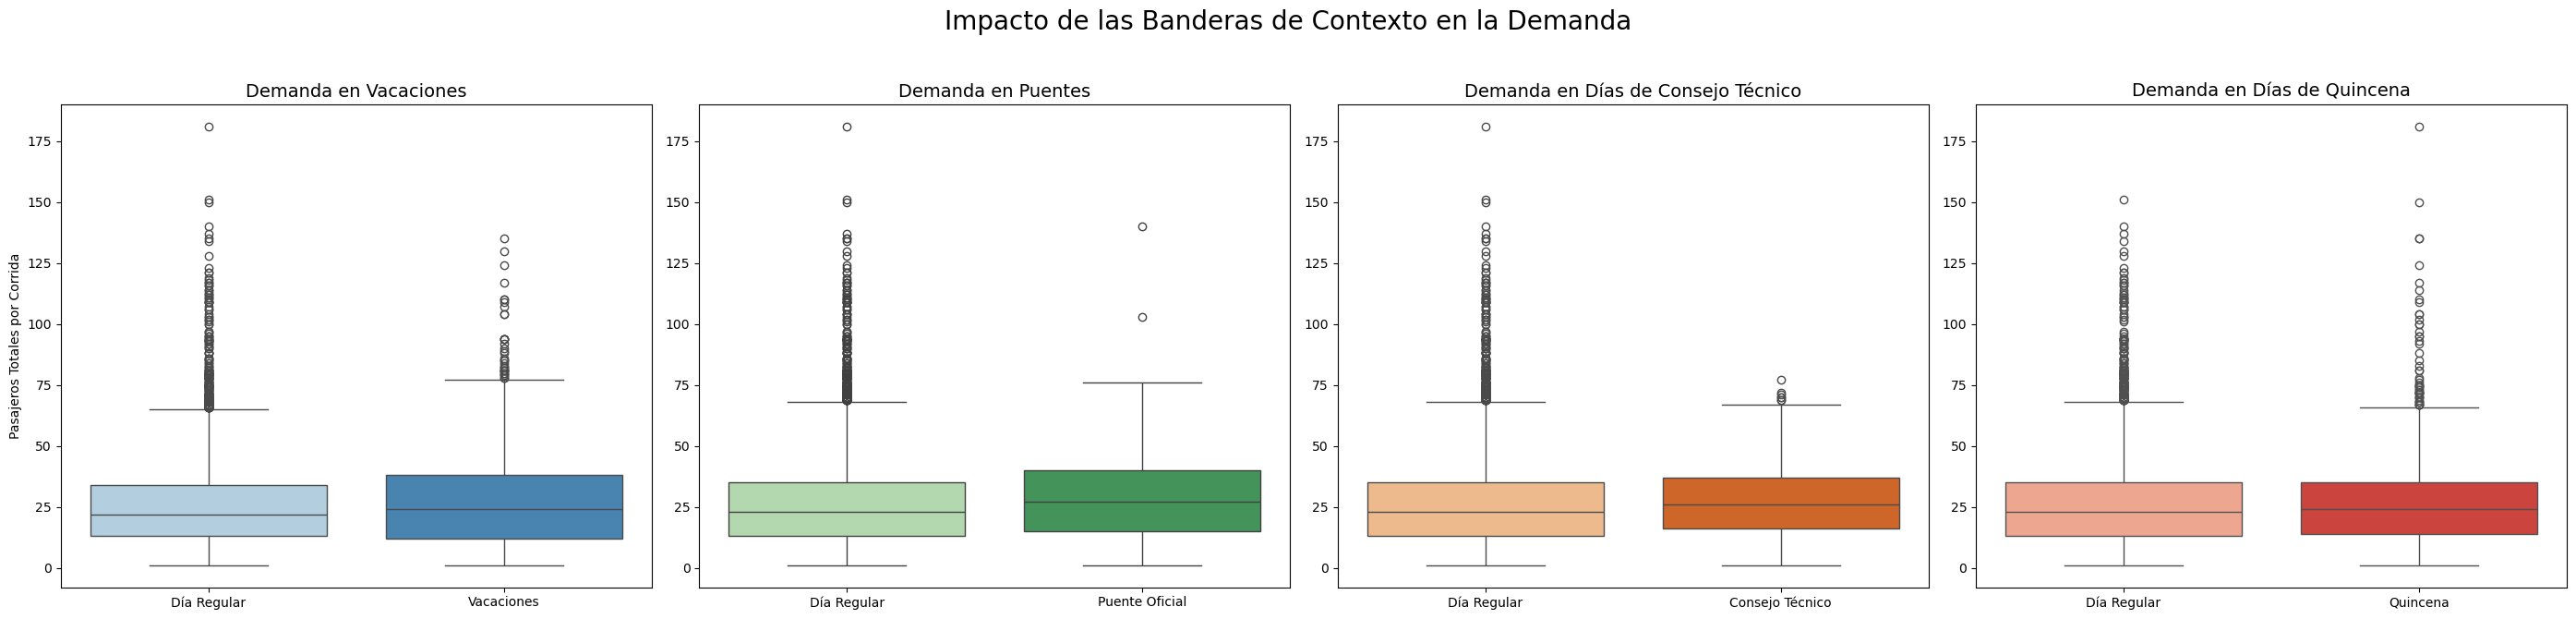

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Visualizando el Impacto de las 4 Características de Contexto ---")

# Creamos una figura con CUATRO subplots y la hacemos más ancha
# <-- CAMBIO: 1, 4 en subplots y un figsize más grande
fig, axes = plt.subplots(1, 4, figsize=(28, 7))
fig.suptitle('Impacto de las Banderas de Contexto en la Demanda', fontsize=20)

# Gráfico 1: Impacto de las Vacaciones
sns.boxplot(ax=axes[0], x='ES_VACACIONES', y='PASAJEROS_TOTALES', data=df_modelo_demanda, palette='Blues')
axes[0].set_title('Demanda en Vacaciones', fontsize=14)
axes[0].set_xticklabels(['Día Regular', 'Vacaciones'])
axes[0].set_xlabel('')
axes[0].set_ylabel('Pasajeros Totales por Corrida')

# Gráfico 2: Impacto de los Puentes
sns.boxplot(ax=axes[1], x='ES_PUENTE', y='PASAJEROS_TOTALES', data=df_modelo_demanda, palette='Greens')
axes[1].set_title('Demanda en Puentes', fontsize=14)
axes[1].set_xticklabels(['Día Regular', 'Puente Oficial'])
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Gráfico 3: Impacto del Consejo Técnico
sns.boxplot(ax=axes[2], x='ES_CONSEJO_TECNICO', y='PASAJEROS_TOTALES', data=df_modelo_demanda, palette='Oranges')
axes[2].set_title('Demanda en Días de Consejo Técnico', fontsize=14)
axes[2].set_xticklabels(['Día Regular', 'Consejo Técnico'])
axes[2].set_xlabel('')
axes[2].set_ylabel('')

# <-- NUEVO GRÁFICO AÑADIDO ---
# Gráfico 4: Impacto de la Quincena
sns.boxplot(ax=axes[3], x='ES_QUINCENA', y='PASAJEROS_TOTALES', data=df_modelo_demanda, palette='Reds')
axes[3].set_title('Demanda en Días de Quincena', fontsize=14)
axes[3].set_xticklabels(['Día Regular', 'Quincena'])
axes[3].set_xlabel('')
axes[3].set_ylabel('')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [16]:
df_modelo_demanda.head(10)

,FECHA_HORA_SALIDA,CLASE_SERVICIO,TIPO_BUS,TARIFA_BASE_TRAMO,HORA,DIA_SEMANA,MES,ANIO,PASAJEROS_TOTALES,ES_QUINCENA,ES_VACACIONES,ES_PUENTE,ES_CONSEJO_TECNICO
0,2023-01-01 07:00:00,DOS PISOS ETN,MAN AYATS 2019,978.450012,7,6,1,2023,2,1,0,0,0
1,2023-01-01 08:20:00,DOS PISOS ETN,MAN AYATS 2019,978.450012,8,6,1,2023,5,1,0,0,0
2,2023-01-01 09:50:00,DOS PISOS ETN,MAN AYATS 2019,978.450012,9,6,1,2023,2,1,0,0,0
3,2023-01-01 13:15:00,DE LUJO,MARCOPOLO 2019,978.450012,13,6,1,2023,30,1,0,0,0
4,2023-01-01 15:00:00,DOS PISOS ETN,MAN AYATS 2019,978.450012,15,6,1,2023,3,1,0,0,0
5,2023-01-01 15:50:00,DOS PISOS ETN,MAN AYATS 2019,978.450012,15,6,1,2023,4,1,0,0,0
6,2023-01-01 17:00:00,DOS PISOS ETN,MAN AYATS 2019,978.450012,17,6,1,2023,7,1,0,0,0
7,2023-01-01 18:00:00,TURISTAR LUJO,VOLVO LUXURY,978.450012,18,6,1,2023,22,1,0,0,0
8,2023-01-01 19:30:00,DOS PISOS ETN,MAN AYATS 2019,978.450012,19,6,1,2023,3,1,0,0,0
9,2023-01-01 21:10:00,DE LUJO,MAN AYATS 2015,978.450012,21,6,1,2023,27,1,0,0,0


--- Generando Gráfico de Tendencia General (Corregido) ---


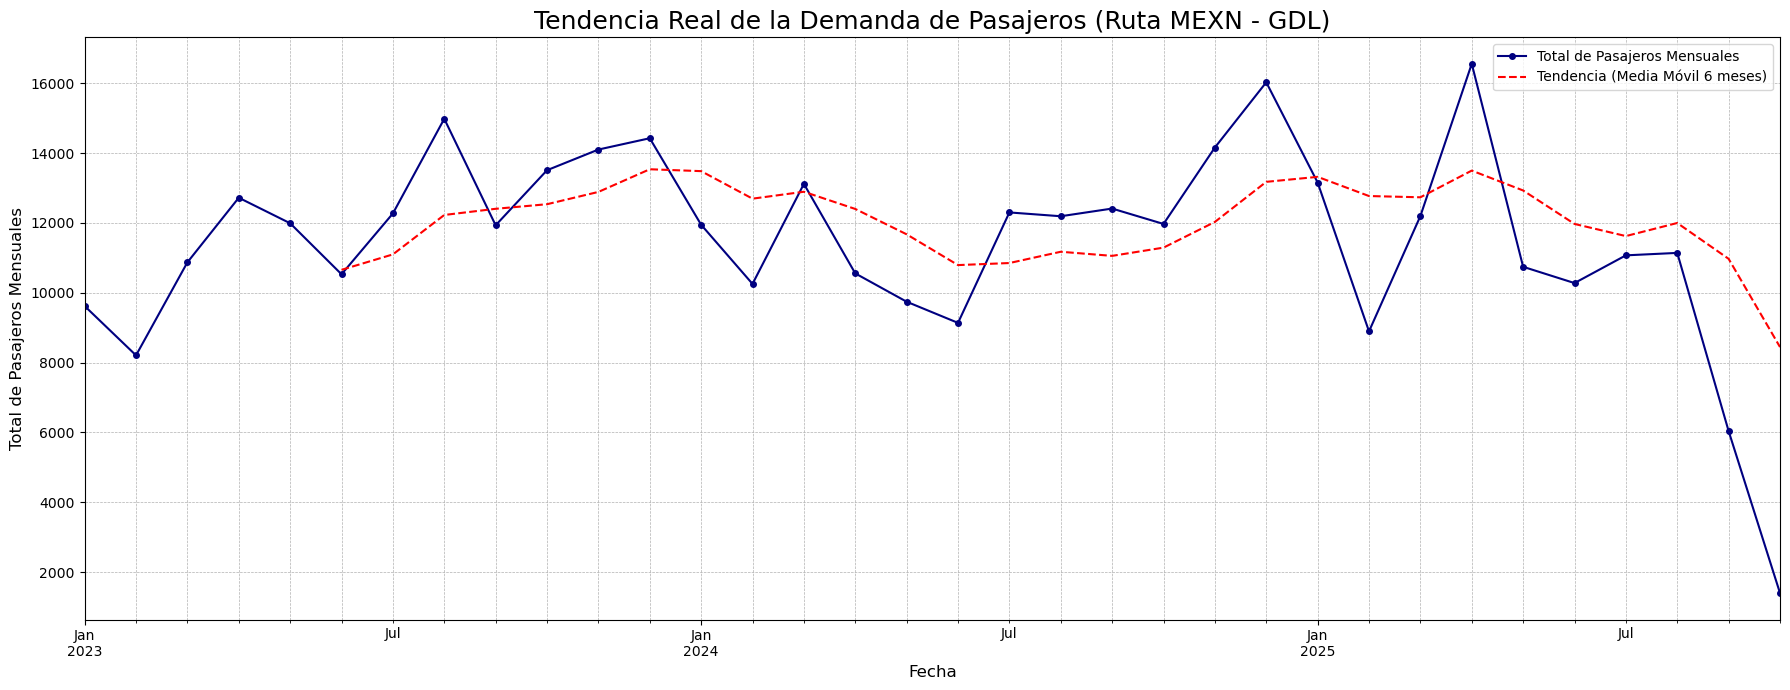

In [17]:
import matplotlib.pyplot as plt

print("--- Generando Gráfico de Tendencia General (Corregido) ---")

# 1. Preparar los datos: USAMOS EL DATAFRAME AGREGADO
df_temporal = df_modelo_demanda.copy().set_index('FECHA_HORA_SALIDA') # <-- CAMBIO 1

# 2. Agrupar los pasajeros por mes
#    USAMOS LA COLUMNA OBJETIVO CORRECTA
demanda_mensual = df_temporal['PASAJEROS_TOTALES'].resample('M').sum() # <-- CAMBIO 2

# 3. Crear el gráfico
plt.figure(figsize=(18, 7))

# Graficar los datos mensuales reales
demanda_mensual.plot(label='Total de Pasajeros Mensuales', color='navy', marker='o', markersize=4)

# Graficar la tendencia con una media móvil de 6 meses para suavizar la línea
demanda_mensual.rolling(window=6).mean().plot(label='Tendencia (Media Móvil 6 meses)', color='red', linestyle='--')

# 4. Mejorar la presentación del gráfico
plt.title('Tendencia Real de la Demanda de Pasajeros (Ruta MEXN - GDL)', fontsize=18)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Total de Pasajeros Mensuales', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
df1=df_estudio_1[['CLASE_SERVICIO',
    'TIPO_BUS',
    'TARIFA_BASE_TRAMO',
    'HORA',
    'DIA_SEMANA',
    'MES',
    'ANIO']
].copy()

df1[['VENTA', 'DISPONIBILIDAD_TRAMO']]=df[[ 'VENTA', 'DISPONIBILIDAD_TRAMO']].copy()
df1['DIAS_DE_ANTICIPACION'] = (df_estudio_1['FECHA_HORA_SALIDA'] - df['FECHA_HORA_OPERACION']).dt.total_seconds() / (24 * 60 * 60)

In [22]:
df1.head()

,CLASE_SERVICIO,TIPO_BUS,TARIFA_BASE_TRAMO,HORA,DIA_SEMANA,MES,ANIO,VENTA,DISPONIBILIDAD_TRAMO,DIAS_DE_ANTICIPACION
0,DOS PISOS ETN,MAN AYATS 2019,978.450012,8,6,1,2023,888.359985,0,0.335278
1,DOS PISOS ETN,MAN AYATS 2019,978.450012,11,1,1,2023,880.599976,12,2.419757
2,DOS PISOS ETN,MAN AYATS 2019,978.450012,11,1,1,2023,880.599976,12,2.419757
3,DOS PISOS ETN,MAN AYATS 2019,978.450012,11,1,1,2023,880.599976,12,2.419757
4,DOS PISOS ETN,MAN AYATS 2019,978.450012,11,1,1,2023,880.599976,12,2.419757
